In [1]:
using ArchGDAL
using Images
using Colors
const AG = ArchGDAL

ArchGDAL

# Reading the raster data

In [2]:
function gdal_read()
AG.registerdrivers() do
AG.read("Isle_wight.tif") do dataset
band_1 = AG.getband(dataset,1)
array = AG.read(band_1)
end
end
end

gdal_read (generic function with 1 method)

# Writing the new raster data

In [7]:
AG.registerdrivers() do
    AG.read("Isle_wight.tif") do dataset
    band_1 = ArchGDAL.getband(dataset,1) 
    ref = AG.getproj(dataset) 
    new1 = ArchGDAL.read(band_1) 
    geotransform = AG.getgeotransform(dataset) 
        
    raster_band = AG.unsafe_create(
        "new_band.tif",
        AG.getdriver("GTiff"),
        width = ArchGDAL.width(dataset),
        height = ArchGDAL.height(dataset),
        nbands = 1,
        dtype = UInt8
    )
    
    AG.setgeotransform!(raster_band, geotransform)
    AG.setproj!(raster_band, ref)
    
      
    AG.write!(
        raster_band,
        new1,  
        1,      
    )
    AG.destroy(raster_band)
    end
end

Ptr{Nothing} @0x0000000000000000

# Checking the newly created raster band

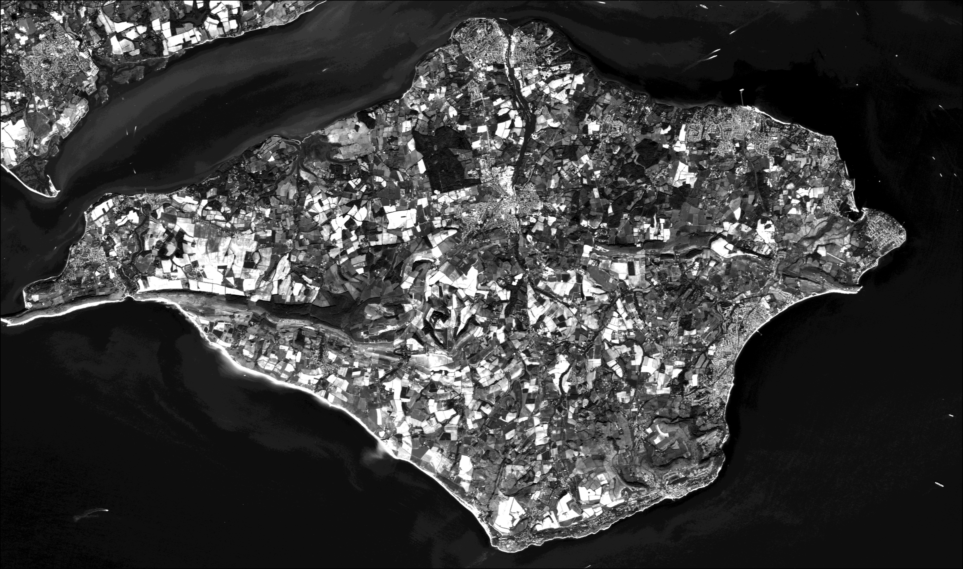

In [8]:
AG.registerdrivers() do
AG.read("new_band.tif") do dataset
    band = AG.getband(dataset,1)
    new = AG.read(band) 
    band = AG.getband(dataset,1)
    band_array = AG.read(band)    
    band_array_adjust = permutedims(band_array, (2,1))    
    band_array_float = band_array_adjust / 255
image_1 = Gray.(band_array_float)
        
    end
end

# Plotting the raster data

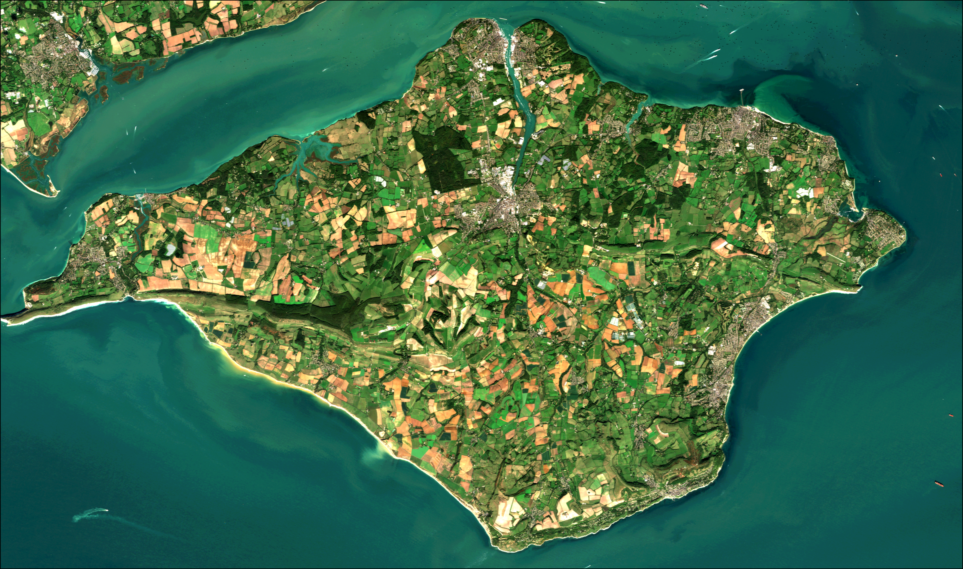

In [9]:
ArchGDAL.registerdrivers() do    
ArchGDAL.read("isle_wight.tif") do dataset
    number_rasters = (ArchGDAL.nraster(dataset))
    width = ArchGDAL.width(dataset)
    height = ArchGDAL.height(dataset)
    m = Array{Float64}(undef, height, width, number_rasters)
    for i = 1:number_rasters
      band = ArchGDAL.getband(dataset,i)
        b = ArchGDAL.read(band)/255 
        b_n = permutedims(b, (2,1)) 
        m[:, :, i] = b_n
    end
    typeof(m)
    image_2 = colorview(RGB, permuteddimsview(m, (3,1,2)))

    end
end